In [1]:
## Code alongs - CNN

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [12]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [13]:
# 50000 images, 32x32 for each image with 3 color channels (RGB)
x_train.shape

(50000, 32, 32, 3)

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
# remove extra dimension
y_train, y_test = y_train.ravel(), y_test.ravel()

In [16]:
y_train.shape

(50000,)

In [17]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

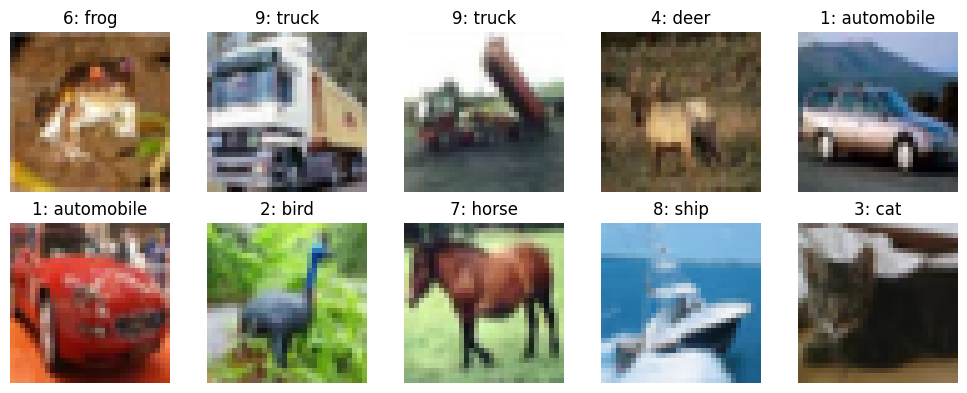

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
    
fig.tight_layout()

In [21]:
x_train[1].shape

(32, 32, 3)

In [22]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [23]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

## CNN model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def cnn_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32, 64]):
    # optimizer which is used for learning
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    # convolutional and subsampling layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel,  # number of kernels in each layer
            kernel_size=(3, 3),  # also (5,5), (7,7) available
            activation="relu",  # good starting point
            kernel_initializer="he_normal",  # initializing weights, good to use with relu
            input_shape=x_train.shape[1:],  # 32x32x3
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        )  # note these can also be tuned

    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(10, activation="softmax")
    )  # softmax -> probabilities for each output

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = cnn_model(.001, .5, [32, 64, 32])

model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - acc: 0.2459 - loss: 2.0138 - val_acc: 0.4757 - val_loss: 1.4539
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - acc: 0.4442 - loss: 1.5030 - val_acc: 0.5439 - val_loss: 1.2710
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - acc: 0.5037 - loss: 1.3664 - val_acc: 0.5746 - val_loss: 1.1930
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.5428 - loss: 1.2732 - val_acc: 0.6107 - val_loss: 1.1052
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.5731 - loss: 1.1886 - val_acc: 0.6208 - val_loss: 1.0735
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.5928 - loss: 1.1401 - val_acc: 0.6490 - val_loss: 1.0164
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.6044 - loss: 1.1089 - val_acc: 0.6614 - val_loss: 0.9947
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - acc: 0.6223 - loss: 1.0639 - val_acc: 0.6457 - val_loss: 1.0227
Epoch 9/100
1250/1250 

In [26]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.323875,1.805969,0.4757,1.453948
1,0.460450,1.467486,0.5439,1.271040
2,0.515825,1.342768,0.5746,1.193001
3,0.549150,1.255258,0.6107,1.105217
4,0.574875,1.186311,0.6208,1.073468


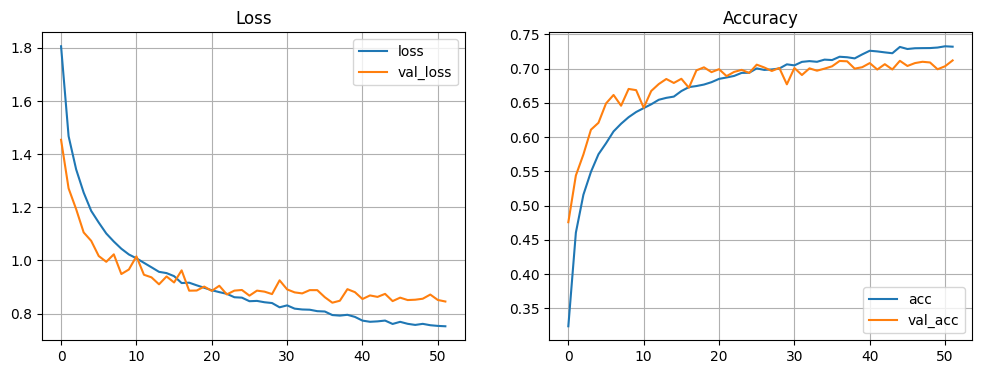

In [28]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[["loss", "val_loss"]].plot(ax=ax[0], title="Loss", grid=True)
    metrics[["acc", "val_acc"]].plot(ax=ax[1], title="Accuracy", grid=True)


plot_metrics(metrics)

## Hyperparameter tuning

- dropout rate
- learning rate
- different network configurations
- which type of pooling layer
- different optimizers
- ...

we'll do dropout to tune

In [29]:
# short patience for demo
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=3, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = cnn_model(**kwargs)

    # few epochs for demo
    model.fit(
        scaled_X_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_split=1 / 5,
    )

    metrics = pd.DataFrame(model.history.history)
    # gets last epochs validation accuracy
    val_acc = metrics['val_acc'].iloc[-1]

    return val_acc

In [30]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1, .6, .1):
    dropout_rate = np.round(dropout_rate, 1)

    dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

c:\Users\Sandra\Documents\Github\AI-Sandra-Andersson-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - acc: 0.3965 - loss: 1.6868 - val_acc: 0.5891 - val_loss: 1.1642
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - acc: 0.6198 - loss: 1.0709 - val_acc: 0.6571 - val_loss: 0.9818
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - acc: 0.6862 - loss: 0.8980 - val_acc: 0.6712 - val_loss: 0.9545
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.7334 - loss: 0.7657 - val_acc: 0.6628 - val_loss: 0.9947
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.7719 - loss: 0.6453 - val_acc: 0.6819 - val_loss: 0.9300
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - acc: 0.8107 - loss: 0.5413 - val_acc: 0.6952 - val_loss: 0.9288
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.8457 - loss: 0.4395 - val_acc: 0.7004 - val_loss: 0.9438
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.8750 - loss: 0.3646 - val_acc: 0.7047 - val_loss: 1.0020
Epoch 9/10
1250/1250 ━━━━